In [ ]:
!pip install ktrain

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf
import re

In [ ]:
df = pd.read_pickle('dataset/final_text_dataset.pkl')
df.head()

,key,interval,text,label
0,--qXJuDtHPw,"['23.199', '30.325']",I see that a writer is somebody who has an inc...,1.000000
1,-3g5yACwYnA,"['4.84', '14.052']",Key Polymer brings a technical aspect to our o...,0.000000
2,-3g5yACwYnA,"['13.211', '27.521']",We're a huge user of adhesives for our operati...,0.000000
3,-3g5yACwYnA,"['26.541', '41.3']",Key brings those types of aspects to a busines...,1.000000
4,-3g5yACwYnA,"['74.083', '82.776']",We have many new opportunities through the way...,0.666667


In [ ]:
df['label']=df.label.map(lambda x: 1 if x>0 else 0)

In [ ]:
df['text']=df.text.apply(lambda x: re.sub('\n','',x))

In [ ]:
df["text"][3]

'Key brings those types of aspects to a business on new markets, new potentials, and even on our equipment of how things run and operate with a pretty big, long experience with their team.'

In [ ]:
standard_train_fold=['hh04W3xXa5s', 'GdFP_p4eQX0', '4iG0ffmnCOw', '81406', 'qyJiDgtj6YE', 'KI2sU-mhM44', 'qXisb7w9LjM', 'CLkTjujFVKU', 'aMtFBGh2wKI', '2OLVF-KEaZU', 'Or-9Nc_GAq8', '72tXTrSXoMk', 'hSgKOKK3L8M', 'YVHJpAROBvQ', 'pVzHaakhKAw', '127470', 'wY8JbFOsp5E', '-iRBcNs9oI8', 'sLaTZtL0ZIk', 'txjqbr6FoZs', 'jVayR0VClxQ', 'gZF-YNQHqwI', '214095', 'Z3fcd1wdzr0', 'kjQAkrdbREk', '81538', 'mpfSRGHFY0g', 'pqAGD3ijMPw', 'jQ3EmbRIe58', 'CHh6hWo1AFE', 'zqkawTdHN5s', '-ZgjBOA1Yhw', 'rz4Ax6xfZHQ', 'sw-smuVRByI', 'UTNP1roJV3I', 'flGZteJUNYU', '273531', 'QNxiqu1y1N0', '270665', '_iRAn6feOmw', '57618', 'vYOr36tdcpc', '6T1GHj7qwYs', 'wLJohZMqR-g', '220548', 'Sb2xMPwNKPo', 'qaoSn1eEyq0', 'omHQ68k50XY', '270444', 'FNbULlE9RKg', 'cKxNJY7sA8s', 'mzTHW2dtbs4', '3gA34VxBijI', '6TKaGMkO69E', 'YmGfjU5PGyE', 'Zr3psuFQoDY', '3f6xCzKx9CA', 'T4e4Ba1sRg0', 'ogGweZUAVtU', 'cyOSDKOxb1o', '19k6sEC7814', 'YrPXbGBvqGo', 'LQnXVd-PR_Y', 'hGRRlXfH0BY', '254298', '192799', '70710', 'CIqRibqChDQ', 'AIPqRuTjI4E', 'dSax_7klbfE', 'gcGZp9JX_qE', 'zoPOeViAdOo', '3B1zIUj-k3o', 'MmJD4KBT0nk', 'RadU51t1kL0', 'T1icdxz0TNs', 'iREkcXde5ds', '40181', 'k1ca_xbhohk', 'wLrgvSYLPUI', '41692', '8Lmqsakmw3M', 'PHJ8eybXJdw', 'CuFLRnu4FQ8', 'a7HHg_JygJo', 'dqragS38hCk', 'FMif4HMBZjo', 'N188QSyfmeQ', 'f49boM5fb8U', 'NYuY6HVjMZQ', '112223', '3DgOMTs3A1E', 'VA6lVHlj5d0', 'PohW-isYMK0', '248837', 'IKXWSNf4m2k', 'bhPB19tr-JY', '251826', 'omBcvw7izuM', 'IB0lGIxP8YY', '07Z16yRBFUQ', 'yNiJGh7JpLM', '0vXaXWx7Rvo', '5FbzKjx3Lho', 'NG7QLq4XlWo', 'kf3fZcx8nIo', 'n5MU2-GFjo8', '189966', '4qjz4BQCZyM', 'lTfsqoo-jKg', 'ejDe6hQWZOk', 'jV6qzF2YROc', 'Sir2QeCh4B0', 'kZfcQ4a0kx4', 'UK_IXtJ2BqI', 'xsiHAO0gq74', 'CT7QOWbhfv4', 'wd-LTpCtAzw', 'qEkFReBuwxc', 'v3l56fl6aJM', 'bYt4wybVLRQ', '233356', 'afCsKTHteg4', 'wrQVnClcNPM', '2mWPHvbKzL8', 'mud6tEqFiEM', '_MGd6t9eZP8', '267278', '34-ogj6rh6w', 'yZWH2P-h0jo', 'DGeBPk1op3E', 'J3-NEG8uoiE', '272375', 'sU40irMa-so', 'Z-26eyME6Co', '-lzEya4AM_4', '227173', 'C3lDRFu1ZcI', 'pu1C7tmYHxI', 'fhY2vbnjuWY', '210238', '245322', '-wny0OAz3g8', 'LAj3rqJvS3s', 'XsEPZydHWdo', 'wVdoIjg3ZFQ', '72385', 'lbx3eu8LUl8', 'zR62DCEMWgs', '7oFimEZJQ_A', 'liJO1yIFsJs', 'FOMXt3lStco', 'FWBCTZiijEM', 'bUFAN2TgPaU', '96099', 'S8yP6lBOdKo', '244817', '84176', 'bVhWpCvpSs4', 'Wo1RxRjXyYw', '131871', 'jcQi90n008o', 'qed3medhsj4', 'rsQRiALH5FU', 'hfvmQuhqMmY', 'iWBx0CP9JqA', 'SMr2DprlLu4', 'r8OPmbZZlpE', 'JF-5nlUNx_g', '08d4NTXkSxw', '0SfejBuLgFo', 'pbFwuNCQlH8', 'IAmZ5iWHxw4', 'Q8naC1qriIU', 'gXuiIWRxrw4', 'R8Kw_4Y9E0s', 'ytXVSpPfKwA', 'SH0wXyhsx9s', 'yALhl-lMBxk', '3QcqpwQiiLs', 'vM7m581tHn0', '46497', '4CKhrjuuofk', 'aNOuoSVlunM', 'jZTe5cbwwEE', '9Jyr5laC8mg', 'JvLMNXW7B10', 'HD17J-FvROQ', '81615', 'x7ZR70cTa84', 'kRs39SO-neY', 'Te-vgmYgGM4', 'Drhrzj1yhVs', '154449', '220200', 'Xq7zLxYHxd8', 'I_r2CP56toU', '_HanACduNJk', 'f-ZNjqLlrm4', '122602', '9zWeMrfr-l0', 'JvgofTcCSEc', 'OPXmk49KyiU', '4poXF3xo6Z8', '208416', 'SqtZGF_f63s', 'HUOMbK1x7MI', 'w8TXP0iz29A', '5OLO6zEbrVw', 'ai7G98thPpk', 'It6xg0WcqJ0', '44780', 'xn9_4n4NpEw', 'olcPEN9x5VY', 'wgCSuviySwg', 'fnFoRPqkQeo', 'BXqnWuDA3H4', 'G8p4QMjLUXI', 'CE9yV4SearE', 'c7xUcM68IFE', 'BDCFV4EqHjY', 'npIVLL_fTf0', 'RIAEgUKtzxw', 'Gbg8qiKQkhM', 'nTBKtwqPIYw', '278474', '3u_Joh0WJdw', 'w1MxXu5D7ho', 'jlCFLG6rKKY', 'Ta_IgA3XJ3s', '257531', 'NDMAVMZyISM', '5eA5HpyFsIk', 'JkHxzOWOLfs', '238889', 'QDRtKv8PvFs', 'RdOc70IrjJo', '5VKMctXBN9M', '44MVdpDEQJs', '3w9I5SBhHNc', 'DZIFCYOhosQ', 'hIQhkTjNaQc', 'mxFU6TrHChY', 'Va54WZgPTdY', 'Y6s_vuUUsJM', 'kmAisuAFckw', 'mI50zj8cTNw', 'YcyHQQXGXWA', 'OEMSGahoCmM', 'Nd55vByy2F8', 'ipLoS44xfO4', 'io85pRFj_dw', '54CM1_GA-uw', 'JAbFsRxxnFo', 'eY64P27khzk', 'nHMHePX9WoU', '230252', 'OwYfPi9St0w', '1bzS0YF5hfs', 'n2BuwHbdilY', 'kiR5zVo2zvU', 'p18PVgfxook', '9-K1CXCXui4', '102168', 'KF5wgQPp2yc', '7ifnoHhrMtA', 'fI9KptYFZeg', 'rBWeo_rEdcU', 'fbHlBmq7Ipo', '298736', '275248', 'R0uRDh-engU', '9pzn93kdP_g', 'cXu56oK462o', 'K9-KyChw8RM', 'QMAztkqnvws', 'o4b7hjQwpv0', 'ERnYvxojeu0', 'faXGVcVcVsE', 'OAV6KKf60bQ', 'x5xF4yu9Bos', 'ggbV7YeSl7k', '238645', 'RqOgkJbqFXg', '_K0okiLaF9I', 'Gmhi58erY6k', 'GICVzJMDfv0', '129733', 'h7p5URoookk', 'nhD9WSEIspQ', 'frNJdG0GkYw', 'gZDyk95Xob4', 'TahiuVpcROM', 'mgpoY1-110U', 'dYyg91d7zjY', 'xyOa9ivNrg4', '7EWOMjaKlus', 'niX_m3aMxhQ', 'e7_2U4lm6TE', '1ZjIX9AK860', '0hCOCt6fWas', 'N3QuD26DuCI', 'U8Ewftg_8CI', '8F1mj-XT6KA', '3aIQUQgawaI', 'qdeQg5dZb2E', '92521', '6UV6ktwbLoo', '90wZz0thye4', 'zFuRNvfC4So', 'IgenXuE4qIM', 'g9rNhtFG9aU', 'jT3FSTBA8Us', 'nNFDj9fRAqE', '23YlZoucbyM', '245243', 'BZOB3r5AoKE', 'jgNu58Da9cs', '7rMLN0KKE5k', 'nxksB2kDJ6o', '6rkV4QRcVnk', 'asWraTfIqq0', '7R70kKqtGh0', 'BvvttuYysvg', '270449', 'So3bPzg2bq0', 'Wnw1IAEDwDM', 'UUukBV82P9A', 'xP81rX2ATLI', 'y-nEcwAyQos', 'zi0a6r52ZlY', '100499', '7fPYpqzw1iY', '261900', '261902', '-3nNcZdcdvU', '256976', 'KEUVzxC7T3E', 'KUVGWCTT5DU', 'rVG8gOAY0JE', 'p19Hsjx2xgI', '244261', 'qDIh6YNbIMU', 'N7IerkWUClI', '43456', 'pfCPogxnUfw', '282586', '73447', '4ZhIx2ozUIE', 'ZltpfWh2aIw', '266938', '73449', 'QoIsjc4-GIg', '8X5tGQLBqPo', 'Tiq67-bAV3M', 'B1B71X_SmwY', 'UjT8pHMN8Q8', '98442', 'iceSGs0MXaA', '110203', '74101', 'A8plGi4rbxM', 'grePRQ8zonA', '9K4aWWoXuyU', 'Zo8jCDGMWjw', 'I8MM8y1XVjs', 'L0WUuWYNeCo', 'aIUF3QJJOF4', 'K1VeXZxR24U', '259260', '708sewcSXVY', 'Wfn7XvSEwUA', 'l-nM_U1qpko', '128752', 'gm4l099casQ', 't7a3zECpT4k', '9BceQC_SdTM', 'trQLgl6ncmk', '266396', 'oHV99Y_EWfI', 'L382XZ6iZmM', 'X0jMZoxUL2A', 'D1I-Z8jaby8', 'z-bupzylxEc', '125730', 'K62NK2KYhws', 'jYT3-RQFy1U', 'A2E78CGi5TU', '7hSWYI99-24', 'eeN7l4R3nPc', 'nmWplIQhvoA', 'UtuTyW9pUN8', '83859', '101851', 'G3RPgs_7l3U', '5R5fDxZUL8M', '5PqwxUYIe3c', 'd3EeIRaMbbk', 'qbIajpM7U3Y', 'Nmd50Uzyybs', 'Jh1uDYOJMwk', 'AjgDuPEp9sI', 'iMG962Rj3Vw', 'Ua4g9q0r-dI', 'kU6YY2z7z0I', 'X7-Gbk8gAD0', '856LGms_0s0', '9cSJglGi9Pg', 'rZqWAnrJ1Nc', 'gEgcpVY8WK4', 'Bg-PA5KTjNs', 'SWHmteF5Rlk', 'gr8mzv2xZ2s', 'i6UngvEEuNs', 'yuwvVTnsDjc', 'ULtBuI6nMaY', 'sIGAq2J4KKI', '4EEru3cZwXo', 'qlDiE1d45Bc', 'Xx7Y2YIbleA', '225416', 'xomMHflvVDw', 'ahcAFnY6iAY', 'Gvg_80PlAAs', '216007', '3DOrdP4H8SA', '186631', 'zaTyjiyrHnk', 'AGM-hNupJik', '270956', 'OiMkqEH5WeE', 'vM3YB7LmMq4', 'M2Pb2kx77ww', 'lVj6ZdyW9pI', 'Dws8ZrzF7xQ', 'taCchyi5h68', '30763', 'SuKnUzid-1g', 'E8L1Z71vKG8', '9zBj8VkRBpE', 'Q_py5n2fQXw', 'VUrTT7xsrec', 'ZdX9sUd3bAI', 'GpRDC-S88dM', 'hmjfBZGGZR8', 'wj3ur4fsiN4', 'DbAppk7xT0Y', 'ABSC1JNdpTw', 'cnllFPRyBFs', 'fbSxct2JcKU', 's1Yo_MCiMPc', 'EoC83JhkCAw', '1olbQVO_C-8', '0p9XKC_J3hU', 'rv1gp0wEhI0', 'HByf7qiO-Kg', 'aFjMWlR1QAY', '424vOT3Nnyk', 'jXp595jj734', 'GxWLhv-Vt78', '110788', 'TxJjAK0WrOY', 'rLHJ_ebXCHQ', 'v2DFe9X-jCY', 'tRSPfPlNbMU', '1fqNb8cfLFE', 'ZUqTWOx9jYU', 'PN3ApHIGopo', '_KGd7IpX3B4', '38374', '266852', 'R0o37yJ1PP0', '245497', '92533', 'RKP6j28FCWE', 'PQYmOknHA4c', 'q4hP2j7oewo', 'XVSDfgstFUQ', 'W-ptEZFARVo', '127539', 'CqFt3_uka14', 'I--8nRKCkJI', 'bMuoPr5-Yt4', '52839', 'gAMbkJk6gnE', 'hlYDicOj2m0', 'XPoY4LD-A1I', '9sAoeFTKILY', 't2U7w3K2qac', 'VgqI1KRnDSw', '92331', '220134', 'LppEvM60-xo', '1ESU5ONMMxs', 'FJgO-FICHlA', 'KLy4aBLqwCk', '256935', 'GTGtVdAuyRc', 'JzydLJw6y6o', 'flBtk736di4', '69NtV79qgOg', 'q-0gu48ClF4', 'm7SJs73SF8w', 'L8VjQM9HQfs', '5oEuiBPUTYc', '4qVvLLFEYnk', 'cWN1bibicHc', 'b7DK08bWU6c', 'zKNAu2CCeRs', 'YfxtwXXkCmc', 'DR9Hhpy8aA8', 'kcIGTPHEsNo', 'fzuTEKwNS94', 'v45zoIrjoTo', 'GOj7TBcEA8E', '1RBT_QoSkIU', '245276', '9K5mYSaoBL4', '-aNfi7CP8vM', '292277', 'ymPQOY2O_nw', '21137', '208148', 'aDvgbBqTWWE', '6PLlauWxF5E', 'bCDfIJ12oqM', 'MbpPBLUjpV4', 'hawztAtYHCE', '45c3QQzGakM', '5XX0csik6VQ', 'bI3DTH2yTbM', 'k8NgVOCDYKM', 'WBCRTcMJZZc', 'k5-3KuvCFms', 'w44JDB1NmqM', 'SaNXCez-9iQ', 'YcJ5RJYUr7Y', 'AepwIhSbAws', 'y5JdqGL5DRc', '261267', 'BseI8-TYWm8', 'e1E5W_ZefmY', '125895', 'AGFgaKPzjMQ', '1A-aRhYx-GQ', '_8pvMpMdGM4', 'TfBVq9oWBmM', '_Vp4SDp_knI', 'TM7cHOHfF70', 'n-sgVVTE9Io', 'HWLpH3NMtFs', '22821', 'SGsiGz2fdpo', 'uITHY4LORDs', '2h9VVQUZjK0', 'jZnFr-Mzj9M', 'GJyzeK-Cn-0', '270416', 'QEG_hkJsaYc', '2w7rpDe-HoA', 'TWf0XFpXwfs', 'JYdfUNjyYxo', 'mNurUl_Q2UY', 'TNwwVWA-oAE', 'G1Z_JUTgZqo', 'bfy28AlY-TQ', 'mL2v-sODUZ8', 'jjbOD6u7V34', '0Xs8wJrAmxs', 'uyeQsv2tq44', '208299', 'wtCKzu8eVJ0', '87MsiC3E2-w', 'mxa4KXSz9rw', '264418', 'SYnygYs-fAg', 'YJJoYkFPmds', 'wvMA0r3esw8', '238060', 'Uw1nWfSuyo8', 'Jz9nlw15QZo', 'WSjlhBDxNW8', 'Zg9DKOHJdw8', '244836', '102184', '3paDwuRQP1w', 'MZoLQD83R-4', 'IiGzuoblKSM', '215259', '_26JmJnPKfM', 'RST6PgpsLws', '0BVed2nBq1g', '2YwgSmmLibs', 'JGZb_ygtB0g', 'dbpGH5iP0GE', 'U4-u5NZLA_w', 'Zae-zQ3VBpY', '89951', 'GSnt_fW8qjI', '233366', 'ULkFbie8g-I', 'PbyI-sUzLZY', 'SCXp4l0CO4s', '216857', 'AHU3PUztC_M', 'RdExUaEIWIk', 'zwTrXwi54us', 'damyXH7mBic', '224599', '238683', '22880', 'Cb8ay6WtJuM', 'zrFZAofNGi4', 'Rt9rN1ntS3E', 'uBgRo9tnv-I', '202810', '_4K620KW_Is', '252177', 'rApOTQgFW6Y', 'Rugd2NMu4bA', 'ssH8WQF4eN0', 'IlgnbEdOhmI', 'HS-2vVP95u8', '0zl_GDVzykw', '126831', '130426', '60Qw70Rd9Yg', 'kY64gXOapYk', 'MpuWcGn2Lcg', '119348', 'sKwPCpFtUUI', 'YRmjALBdTdE', 'FylhSeozvG8', 'cSrM5mHACmA', 'wOKWTFYYMuk', '209775', 'jzNIU-w0MVo', 'znNt--6itO4', 'RE-LIPOFnrE', 'RvIohowRPAk', 'ACOlIiRdDyE', 'Y9fvHRNz2Bs', '2-4autDbHVQ', 's53UAEi7JEY', 'r_vjlTcrI-U', 'EpadyoYlAjQ', 'VjAvqFXEmmk', '96194', 'GkoBk5K-FH0', 'gv43BPYYxKQ', '0WIwQgH4lKg', '140293', '7sgAWvbLtiM', 'q7BxnIM2_z0', 'B1PzCwfgXyU', '6ng8CZ0ULK4', '0OXeN3MhFeA', 'JW2HHfQiGVs', 'uQds2dN1AiM', '_ZlF5Q9W1DM', 'icIS9VfbzMw', '231025', 'HgDdU_RB9UA', '128949', 'qFsGMA75-oQ', '270628', '2vX-ZRQQDwo', '95mDHiLeDCM', '18QjfdhJEM4', 'Tdw0fJt0lco', '74870', 'LX2rT5C3sJs', 'iex7I7iVnLk', '33ueXDUn3mA', 'G4HMKRdIva0', 'tw2xFbfgV4U', 't4-ZulW5np4', '236696', 'zURYO3k8lW0', 'wfLrS6CdFs4', '219310', 'L6pg3DQKoH4', '80627', '80620', 'oj7A8mpuBeQ', 'xNYsfeSgDCQ', '11650', 'afDJvn5nmtY', 'YY2yjEEoB3U', 'pFh-SLxltms', 'ZLCK8WX6qFQ', '1F0qH0EEBfo', 'VzDXgBOe5iI', 'L2uC4_Co9uw', 'UPghCarcnMc', '3ZmLhK_YHl8', 'DaXkixKFEvE', 'Kpe5fISxRTg', 'QXPOQW2tRBs', 'ZW4Oe_fKJM0', 'We5nTulz1Vs', 'j7fRIGphgtk', '261326', 'oecQ9yDtfx0', '255224', '6vbd4o5rIjM', '4VA4kqMnEqA', 'XCyngF93SmU', 'zWfDRPy4lXQ', 'ZXHX_e6HCI0', 'tdIZZ9v0IGA', 'OSyKmOye5Uo', 'iR1Os7FVGHs', 'Nzh2KkaGwrE', 'ysGFcG_PI5I', 'oZkWWCQw2Js', 'iM3wSwoAtwk', 'Lxs_6Tvq12E', 'erBIIKA6r5Y', 'sK9_de5Jx4U', 'VoETCD8fBLI', 'DQ7QKE3hzVg', 'IawsOlEKRf0', 'pf6HYOOwfGE', 'z8bWG2z-bMM', 'ZZ1IyZaMTWQ', '33439', 'MRU65o1odI4', 'V5lfNohNlEg', '4hEWns7JBg0', 'qrI7XCKRFNk', '92tWNUhG9DY', '265959', '30162', 'SWhfaL7AdEc', 'hhK7q30p0Jk', 'RAiO_rChmdU', 'BRzjQHYWbSs', 'nKiC9sEP2vM', 'AlmUwZgY6bs', 'etPDgRjrnJ8', 'qP4uuMI-JSk', '255343', 'Bf5owLv3X98', 'LZl9Sj1safM', '137827', '233171', 'wxxqXK9x-64', 'otna1VHHCow', 'GMjQUrlMa50', 'wlrb0HyIs-Q', 'q1_knonj0Lw', 'o8OZGBDPD8M', 'YF3mDOuF46M', '271594', '-vxjVxOeScU', '8ovb-GaZ3QE', '6MloL1gIccs', 'OxyQSJMvWBo', 'W-pA0lOGLR0', 'fjE2EZKgQm8', '271598', 'oyHKiX5YGDE', 'c5-L8vC6_sk', 'F5SGdvSRJmo', 'R-HKj8Yn06k', '288714', 'zj4PzGtFwJM', '3aD0xAgxxyw', 'PYylJk8R9Ak', '110766', 'JdFaSggG58c', 'T-vqHR989bM', 'Q2uHXKA8cq8', '3GyEnzE1NTQ', '131650', 'mRnEJOLkhp8', 'lzyVWNrkgbQ', '225343', 'sPxoGNvnVzg', 'jPf0LjZAS14', '206606', 'Rse6laKf1i8', '50453', '8-Hi9NmF4rM', 'yDIFWzOBjXc', 'S_tGoxSEh5Y', 'dsob2MgUPpA', 'OFBc3z99bIc', 'ta26Z2YEVMQ', 'TVhXqAI9gyA', 'FX87sfrE47w', 'E_oqbJatW3E', '0FA32bEZ6xI', 'gzZ8NTeTzRs', 'FvoZgWvc3gc', 'XyBU_gZtU0M', 'UKVwc6I06x8', '2QOf2wSu0j0', '225768', 'AVScVfLgNmw', 'dLzsNc_hzkQ', 'o2miCpS7Hwo', 'MnFRVJtHAeo', 'fdK_tsvBXJ8', 'x9E8yaFCX0Y', '2f6ZHqJ76EU', 'iS91daVpH2E', 'FSGL5K2EEdo', '136205', '282560', '271366', 'JCg26b8EO48', '5qxZFmIaynE', 'GUffC7vu9zA', '257045', '7U_z0JfleAw', 'QQVRIGEUa_Q', 'StgqrTr0JqU', 'ATfnMuJJDkk', 'uea5xJZygsc', 'RfKxYiFd-fs', 'gC_wF3uKFW0', 'e0ltF8zpEcw', 'GjCUDqWSI6c', '9Un1O2ypJmI', '_JcML8u5Wes', '6Vg10LxmWUY', 'cZDAM6NjBzE', '6q5uKCgairk', 'eo8L7lCTjDQ', '244180', 'xRJXYUZVdas', '_iy7ftq27xE', 'YQUutkMdLj0', 'avW2m6VHTyg', 'ZMAoUt0SD7E', 'i5of7ZTkyfw', 'icehEYAiimM', '2RC_DXV_dPQ', 'tvE_DucE0_k', 'FP3o75bpi8k', 'W40BaML7mzc', '121358', 'skp_SpnIOCM', '224817', 'r917wP1qsL4', 'N7tS7A0WWpM', '3oHPsYc8bmw', 'WHUHTmtBJWU', '0nJrksJ7azM', 'c_FJuhSte8Q', 'plsot5mFAtQ', 'Az3e1Opu0LE', '2c2fhh_Dsoo', 'GAY5ICoVnA8', '125708', 'nErOMpqvcRg', '45186', '45184', 'REkPZ77s3Vc', 'HQ2LwfRcrVc', 'a5FKWiI90hk', '93821', 'OEesmAnTpeA', 'AmGocfFQfVE', 'khw3YCTFLfs', 'K_5u2Wh_wGk', 'cZVM4svwE90', '210618', 'JX-mwjSw0dk', 'g99kISQbyuI', '209354', 'hj1ph17-0jE', 'ep3IasggD3k', '0rE8jEvQW_I', 'XEZ7e4pf1xE', 'rexJoy4RMdY', '122842', 'IW7IssCKgmI', 'pttwIaJmfcU', 'tXQQ0joMq1Q', 'Ob8vPQCPDX0', 'sFLTjqVS7AE', '295793', 'hdLC4Ro977Q', '_WkXQNVLQXs', '190740', 'WovurMxG2Aw', 'Sglx7douG_4', '984VkHzXl8w', 'JwzxqrD8tIo', 'XQxnAPleuCE', 'obnOnuzb-Xw', 'wI7DDCRh4Nw', 'mXdvCxLbpuY', 'nZEPf7a8GbI', 'v5AAvrZuR2U', 'pf-78LF4ORE', 'L_XttWZBKss', 'Yi6Qyn4X8is', 'fTNOAssiTYk', 'aFhT0px8AMw', 'kh6eynD9OIk', 't0Wi5Nb6kbI', 'kM6wo2bb3nw', 'Ry2NJPd4N3s', '10223', 'v0a8N7Y-Vfc', '1JQ9UCBEmCU', 'vop7tN_K64I', '15837', 'VN1IPN1TL3Q', 'wCbQxI_-GKU', 'gPWyANEm0eE', 'FfavRdRKsAQ', '40260', '80914', 'O8IJh_L0EfM', '180923', 'zcG0ms7CdBE', '12812', 'Cj7R36s4dbM', '219775', 'dyZdiWNflko', '298774', '38019', '4wuug3-5cWo', 'VDjnKdFxuBE', 'uYzZB4ccG1Q', 'WxYb2x_irTM', 'XXvSLz8QmGk', 'EEUGfVTyTQM', 'emtvrtk-jsU', 'xPhlDO-2Foc', 'c805Td8A_Ek', 'N0Y7x_fJ0Nw', 'kkaX3okuvjI', 'rWjPSlzUc-8', 'TJelZLbfT2A', 'krHZuqfXrPU', 'gRAmIaSlm80', 'QMEgjkpyVzQ', '110754', 'uN0d3ZOkDp8', 'jakiZQd4boM', 'cyu1HhakSaQ', 'VVZLA2neYyw', 'MPRqaQqrd9Y', 'SMzV26l6iA0', '106514', '224772', '1tQOvm5eQOA', 'X2leyjuolDM', '218708', '239572', 'vXABB4tBBUU', 'mRPIse3OO74', 'HqtvFTa29L8', '241164', '6YNAmRjpxlA', 'VhKJm_jiciU', '8404', '206507', 'LUKIYWa0UGA', 'VAFdgtqZz4g', '6TDXQtGUNEs', 'TUzD45ghy4k', 'tQk-eoA7JyE', 'nDXKvarLEOM', 'WAXJRnJXmOA', 'a8WV5KEMKSw', 'ItnyexqXR_U', '136215', '136211', 'JMzilFvwNXE', 'bEXCrGIOoWU', 'xwNQ7QuXaps', '88888', 'SSNrLu-eZiM', '83_N43pvgHI', 'PUIsiLk8etk', 'KSyX-lejDcc', 'ou6S6fbfBWU', 'wQkNqbrAlB4', 'bcns0Gu66D8', 'NSihgq4R8Z0', 'jNdvceZ4etc', 'YgyqX4aZ4tE', 'AggyS1coOb8', '3HRnhUin-5g', 'Olx-sTx7HTk', 'lEsFI5YJGDo', 'KD0w4BrNXQg', 'gjEYmdWrBLM', 'I5cS_TlV5B8', '88245', 'BnWvk0YRgE4', '-aqamKhZ1Ec', 'L3b9wwZ8vRQ', 'ZfQYEa2fHGo', 'oNCvb0F-c88', 'o7vcTMAX9fQ', 'ieWQdiQAh4M', 'ZbVa-a2tNFM', 'SLi2gT5H6m8', 'd7Dz34-cZ74', '3kNPvhdF1NA', 'mHIvH6Nnrls', '7wiaDbpiAQ8', 'H-AJ-grXvgQ', '277991', 'a4vRa-_nuJw', '4wdeBJ39Cuw', 'rCQYq4T8SEI', '1YEgMQ1xxzQ', 'CuF-UOcAFG8', 'mHEtr7PHxoA', 'oGnKsroR0R0', '125845', 'tXxXhGD1aMo', '4GYfmpEEtl4', 'jhb6SV2dQzg', 'qjMyjLSORY4', 'mSWwz7dXUP8', '93839', 'iFj9wJaJSPE', 'hOp6I4jGvu4', '_bIJOxiIJFk', 'lWvaIexY2WU', '327283', 'kCQqLNiO0mk', 'KPeos6f4HuQ', 'm8tzdtrgFUA', '2HP4KedfmSc', '8VP1qxX9mh4', '113265', 'XAazxiP6tP0', 'sRex0-9yFFc', 'o2bNnLOEEC0', 'YLA7h1RTa9w', 'QYp0lGhyL6A', 'rwe-hBNpzH8', 'QWaUvAL-yiA', 'jbJF3aphcP0', 'f5k5cF80aUE', '663uRzFOfrg', 'OdKp0hYomgs', 'AKofHsmxa1I', 'uyOrVTq8Tjk', 'Zs8x712Y-CM', '80866', '94ULum9MYX0', '_tBaGXNwlp0', 'AuPCZlKBzq8', 'qYJtbgLqizk', 'm0-DH0k115I', 'yyToAEoUuek', 'veHYwR7ge6Y', 'nsLACXjD4KU', 'ypZhKsR-9iI', 'sqADHmnM164', 'wRKVNiABc0w', 'tgrxA3CiBv0', 'RLHZ6xtIWSM', '4qoB5a6dR3w', '9pdyTplXwM4', 'cMUS4nhcKCQ', 'kSooCdVTI6E', '78577', '65kkuNV921k', 'po5jCjnxW1w', 'nM5S3xxNOlQ', '31tcuDMQ_H8', '47472', 'ZQuGizjoCTY', 'xXIq7YPkdUQ', 'K9faaGel838', 'sFxUNO2HOKY', 'yt9GpittX4U', 'kddCewAsxfA', 'YjNYBBs1AZw', '108793', 'UgTM9y2rD38', 'TO5HjoK8Iu8', 'pkH2TfFN-6s', '-3g5yACwYnA', '264446', '238039', 'cEXJ2zFbC9I', 'Kmtib-wZ0jM', 'FmE9BtTmxnE', 'CVx494kExvc', 'fSOVk2cS-sY', '3n44IP3tCVE', '1k7br8xXMSU', '53742', 'mMeGgB9-hSE', '206376', '27ubp7CLLKQ', 'qFppeQvdfxI', '4Q7OkrJLzAc', 'YWxvIFmYnNU', '4oeKDFIaL7o', 'BMhG11CXgww', '7eJqqvvziQo', 'i714Xt6eb1Y', 'bzPFUVGPS3c', '2PgJok07td4', '3ocpWAmSNUE', 'QLEOYF7Mju0', 'XzhRYIeczg4', '4iw1jTY-X3A', '78Ncka6CY70', '9bAgEmihzLs', 'xgAwddSkrOo', 'ce1ObTPlI38', 'hntnelpiyl8', '8XODJwsvBa0', 'A8c7q_P4jQg', '8u5aet7s9_w', '3FpmKxZgihw', '202990', 'Rw2pzFGosmw', '43371', 'ZzL2sHtTWRc', 'VbSsGRXIwjc', '2HmBM3GGTlg', 'hkGN5q3OOCE', 'eOU_40p9RpA', 'vttEPA6Xffk', 'Wn8nz8GPKkI', '193291', '0EAAfLCQabY', 'MBDZbACupsc', 'oW1OEsP7Dds', 'JY-krIuEUm4', 'rzsk_IvI7bQ', '241172', 'yG3wpvLUQcg', 'XDVkhOziCkg', 'yrIXBklJ5YQ', 'K_K3wpxkRc8', '75938', 'DiOw-w5LDJ0', 'wOjnqud5GBA', 'kx544gnOZB0', '266366', '6slq62RwH3Q', '6WDchK7TuL8', 'n4xRx0J3rYQ', 'oK951Y2N_k0', 'izFBeXMTgds', '276217', '8Cp8c-eQELQ', 'hfK8QtTd7fo', 'auTpzciNgls', 'xge9aYTxxOA', 'mw_ZwML0SbY', '25522', 'Y6zyM1nDhN0', 'QkMTYY69JYQ', 'hjBQmIWiWgw', 'C2xNDBU2Z0s', 'wR3zalLV_6c', '-tANM6ETl_M', 'C74-of1rjg4', 'kzmaKnujN64', '2Wo-0trLBjU', 'lzVA--tIse0', '2cwNG0YuwtQ', 'z6E-ocntPo4', 'd89Z_olwc2Y', 'iEOBNT0HFtU', 'ePiz4zU6crI', 'P35dyIit1yM', '106077', 'ADYia28RrFU', 'YD5vqR15nco', 'XFGHTk_3hGg', '98187', '5OXuBO5buF8', 'MroQfGehC84', '2LpVvLemgvw', 'cjgq9d8Zn9g', 'oWAyEzyp2xQ', 'w4xIyGs-3wc', 'dzSv6GwfF-0', 'S_mxvk4LEh0', 'KQ86HmgwUns', 'rNXM3avNBKk', 'aI1tdJPHz2I', 'axQ5CDRawO0', 'sC1NvtirijU', 'c5AJbOd794U', 'F6Ci45lP5aA', '0jtdrsmVzYQ', 'EOkdFMw0pmk', 'D-DqVICJXBU', 'r1erb5PSm1A', 'dLmtsRyRH4s', '247382', 'Q7nhtfkIPN4', 'LityRNuQihc', '5Fs_7A_V2kA', 'OEOkmrKvTUo', 'dZK01jhM27k', '4Fw9TbWIVJI', 'N3vSaV8Ztrg', '251417', 'hSEfYcIjIr4', 'TksWzxo81Mk', '9XCmrHbU-rU', 'IiX1k0oYW_w', 'zx4W0Vuus-I', 'lKTeLK8nq8w', 'e-2QlzFeyNU', 'RTzDzj4NxIM', '7UlSX-syPeo', '6E-yr6nPxGA', 'pIMByitigYI', 'ZDz8Qr-sJ3E', 'L5a2ijeWpUI', 'MKShLlJ7X7g', '223926', 'IDVbPEket6U', 'G38DwNDQ8Cc', 'JW3OfSCZlhc', '2lj0BaPsJpM', '0JuRmhhgMw8', '25t8nrkUfRY', 'qlDT-bmIzQI', 'MJnc4GUhUuY', '197778', 'ixZAEncExWI', '5QXHyL3BMto', '255226', '238023', 'babuyKl7EAw', 'qo2reupzUE0', 'oDznO5w3v0U', '284673', 'jEQoBvc7V1o', '288766', '8x81fzwcJko', 'mQTaEIrNxnQ', 'yEtfjJOMMCs', 'Vv2DTPyyw90', 'Gg9ZcRlwnbc', 'pAclBdj20ZU', 'CXojk-oSaEw', 'efLrpnuLwyU', '87161', 'C8Fhlk-eczU', 'pjWLxORDDP4', 'YVBsDJtAbk4', 'VcZffwwL0bw', '4Vl6AeEkAg4', 'JLqBVj6f5gI', '31197', 'k0cGUNUHuyY', '03X1FwF6udc', 'N0GhVkCwrqw', 'xbl7bU5PGBs', 'K7KEtrgBkz4', '4H9RfQuqsvg', 'l8LTcZJ-_8k', 'BBSVLGf7zPI', '267799', 'nHP7l5zAwGA', 'mziQcFSsdRI', 'UXvMaHD9kmA', 'ptgBkE_e5js', '4HazSkYihtw', 'PGBrZLC15yA', 'jFNgOznarMo', 'X3p50qqFW_w', 'BuPhjBayua8', '229903', 'jbKDW9URnvM', 'Xo6-V2RlWss', 'DNzA2UIkRZk', 'jfSGWBfVNBI', 'MFrwi-RibUk', 'kwkhYpCHWPw', '1cyUKHOvdYY', 'qrSW93EtuMc', 'TBwetweXRb4', 'hCFV5VLgS0A', '_BMdEKNF5Js', '88797', 'IwQWibE8EOM', 'eW1vgHE6FRM', '1sJjdaXXuJg', 'wUf6AvCMHbQ', 'O0Nn-5UkfoA', '1CjUHNYzW1E', '_PJ26YwqRJE', 'tUTf9R5u6r0', 'Ve-mmCM8TI0', 'kuQWPuhnlHs', 'XAT2IfFFAU0', '8M0AlvtMrv8', 'FLyWn2DCci4', 'WaaSYRPwQBw', 'QbJiphIpzYc', 'H4w9mU8B3Mc', 'oCsrnIomHos', 'TxRS6vJ9ak0', 'VugBIVwSmaI', 'HObh42PhOfw', '_4PNh8dIILI', '251646', '_PKP676ez2c', 'gjSyl6evrWk', '3OuNMjZo5wg', 'cRFiXLzcCOA', 'cAA2mONG98w', 'NZtIGzAzJZM', 'xnNZyfhusAk', 'gfHrSg3BwiQ', 'PANWQeBKStk', '4Z47qIrVil4', '45175', 'IkvL4IAiZog', 'MyDLelMxt-A', 'ZmAIDJ_gcXM', 'JlmpDdm1A1Y', 'soqnBdPOwoo', 'ge071m9bGeY', 'hThsntvCk2s', 'cfX_iuhCbRY', 'ouhCx4TgHlE', 'NuRvTWhELqs', 'x92920ole0w', 'CZigX1ntOsI', 'QWzIJuhLLrc', '94983', 'mN1Z5xEOy10', 'OoOD_VBL0i0', '274219', 'MvFFYObY9A8', 'mKP6TVuixWg', 'UuR4Rw38v_U', '0cBmQ_ItVUc', 'iMss8xBhFiI', '107551', 'dbH51F5Zqi4', 'kRsA87VU6EQ', 'S6S2XL0-ZpM', 'gvrfI9e5xHQ', 'dXMAS2tIknw', 'muOYAxkG-Zo', 'MOfEl_1dh-g', 'CL4hDu95Eqw', 'K9U2TAF9DDY', 'ITQTVfk9Iqo', 'McnbZjgCPLw', '70420', '5qQs9Cfydo4', 'DEFDuYyc-Xw', 'opHUZsc2WO8', '_BtdwH6mfWg', 'zwRBZisdpQ0', 'GMnoxaqqReQ', 'CK31s0kfp-k', 'GRFXnnrQaB4', '260011', 'SRP5FYP71Ng', 'X6-jJO00DMg', 'q3QUybiOYeU', 'EZkOWskJl20', 'FmIS69vB12I', '8UH0aPUf7sQ', '_2u0MkRqpjA', 'd99mfGIenCo', 'RS5WM3q2ZZQ', '1rVly2oeBJg', 'dJ5MXl66-UQ', '2Vtv2gPzM7w', 'kKkZihSbxF4', 'n5J1ZkGUGnU', 'W-q9bPlMIVI', 'EHbZ2EeVags', 'qvIhzmujTi8', '32j1yMF37hA', 'cOcNe3L4VAg', 'bU6CgE_kMRY', '5JMpMKAO-Mk', '9JqwFRCTKOM', 'wNx1ZnQ0MDQ', '283495', '7eWclVCXOtk', 'GMHW6XEO1ms', '4BoE-woHtwA', 'RImmdklTOW0', 'ap465Tlzf88', '37117', 'dDFyJp_OkeA', 'fTKe7E_4OCQ', 'BRdw-_dbJXc', 'Rdf0Psjyrwc', 'w_qYZSVx2dM', 'yHtR71rx16I', '262226', 'yOQHOiswVjc', 'QUpI5kMw_nA', '273314', '97095', 'WYSomBHdl4c', 'fW1pK2L6RgM', '243338', 'N0pKIn6VhOw', 'he475nnmMi0', 'YodtMIsjM0c', 'HUH9BXVmAig', '89787', 'Mw4EZYZAd9c', 'Itqbc2TBXWY', 'Vw4-ae-ucHE', 'dEBug0QYayY', '106941', 'mOnyMWhb5Ac', 'OIJr0voCvVQ', 'EfQoSpEZa0o', 'zPskvGHHQtE', 'MNLG4-diuYM', 'PtH_8O__EAY', 'xTBBDx3DkXQ', 'd38u9n5GOLM', 'aEaM_LOI-BM', 'xfP0bm6Z-7E', 'BAi3ZJo5Vwg', '5Tqu1IXJjGY', '8VB6pdJTpX4', 'aZjCq_hv2Pk', 'PMH4mdJeojE', 'WMzvDL7b4sM', '7Vp6Lvin1rA', '-egA8-b7-3M', '239235', 'MMaEsDdBsvM', 'Ns_h5IVcZ9k', 'Ha7DMd_iKyM', '1A7dqFxx8wU', 'xBsrNFxnnuY', 'HLFaW4oVP9E', 'QE0pAVSPsKQ', 'eTCnM472-cQ', '_xjBqNfiEY4', '2RDubrUjI-k', '206049', 'MFXQH7ZlBJI', '3Wi0if_L6Ug', 'VZqkWIPmH6w', 'XbolrpSc0KU', 'uU_3tbZ1zG8', 'bge5PUG3G4A', '130633', '0r8KVXUCV6c', '130149', 'H26MMmrHTlQ', '114624', 'bJI7-LnKPH4', 'qd6YuFGcBGk', 'KR4MpF0YtgE', 'FX-YgVKC1AI', 'YITXOmhQhYE', 'Wh6sht7xwqQ', 'SxbTZjZD0vU', 'TWMFQED1Myk', 'UtjenieM1Ak', 't80DGfWJ3fI', 'CZVmxwrWv34', '36098', 'ZiM_gkdFGJk', 'sMnbpyFqrlE', 'FphtHpVV-7w', '-tPCytz4rww', '79935', '79934', 'VAr7gJydnys', 'CdB8QBhFccs', 'Oj3XwBBrzXc', 'kxcCxbsKx3w', 'cM1Zuji24dI', 'fGYbbP8RDLQ', 'caLWajc18Y4', 'ltA1VF_DUSc', 'lo0R1mvjDT8', 'FdTczBnXtYU', 'WTF9xgqLIvI', 'owT0_Xfu8a0', 'NCJTV5KaJJc', 'MyfRrTjglm8', '2Crezdbre6I', 'i5bmKlHv-SA', 'aFZIvp3SgHY', 'fDYZINwIs_A', 'cR_KQlNhoNE', 'sn1fEo72gJM', 'TZXcQemh8n8', '184784', 'jUKH63mltLE', 'cSraseCDilY', 'Cd0JH1AreDw', '291121', 'cmJW6mkspkI', 'E_ocLuUw-1I', 'eSHOcLD5T58', 'vrgwwihTxVQ', 'SrMN3rwvCsE', 'PJlDO21zl88', '1o8Gy4J6WSs', '222116', 'vbVLgaP5IYU', 'Wx9nThz5z_Y', 'Ctc23Icfzvg', '255338', 'mW8eL4e7Wrg', '112631', 'uxHBEfIhY-E', 'Gljee9uq_Rc', '275620', 'qszy_WSRFUM', 'lpF-yBYou0s', '4lKz4xyCmkk', 'xw-Blnej8EA', '367506', '-lqc32Zpr7M', 'A0aE2Gzym-M', '90172', 'eTn2P4wmFr4', '1RxliidxXyQ', 'ICeSewdyf34', 'XwOdPYlyqXA', 'assx_NKo-L8', 'ky7Q5onqxGw', 'b_SffSbPVJM', 'ctMCSUT2LlQ', '126542', '234587', 'vlnKSMw5v1o', '290088', 'ShgrdU9WAJE', '4HAC00EAdno', 'Q5YU2sLKVL4', 'u94VPxEIJPg', 'fB816aeHRFk', '4Yxe1_ohz7Y', 'hp3nsb_eIc0', 'vNID-RVhWcQ', 'K7FiMf-Dmwo', '29044', 'oO61Ma17tRA', '3OMgvtWNHp4', 'xvnFF0FiyS4', 'GtRxTvuF6J0', 'vx8j_4DMqh4', '_XWUKMkxa-Q', 'vRhj2bLo1ho', 'JWG_MUy7EWQ', 'rFHIApgUtoI', '257771', 'J6zbBfzW7a0', '6xvVFYR5di0', 'ooGB4BLK9PM', 'APYv5s4ucd0', '241638', 'MhojeOmmjC8', 'esnOE1LefKA', 'wEs7pJH2mqQ', '6IUj6jyoTl0', '367576', 'wb7CfuiIZFQ', 'xlNDpmKgSIc', 'UkqTwAuA8jI', 'xPN38lYBQv4', 'xAApNMTj3as', 'TbZPa_keawc', '229967', 'SmftC-VAfYQ', 'tnhRxo-g3Xw', 'wXuBJvzeC1Q', 'OcqJx_cRc3Y', '273237', 'tL8RzwWSmAE', '27798', 'xaSf1d13WoY', 'S_ISgjJR1bc', '234053', 'N_dNuV-4iAo', 'YB9EUgrzCCo', 'UF9OlX-QNHU', 'xiRUWSUrGSg', 'LUf9vbe0TcQ', '251839', '221740', '74184', 'p5LEk2u8tXk', 'VybXjsmsjAY', 'o1cRmT9qnOc', '6J_yzh1LNAE', 'dCDAcBR505Q', '26WrTHLJJIU', '227416', 'GeSTiDe1hG0', '206051', '3J3Thmd_vks', 'vRydHjRzDX0', '2JY5HXBWO84', 'vA68fTqDars', 'DgO5O-oDeX8', 'YQanVofsHoE', 'BdqoZ5qpz0E', '51224', '6aoTjlvo0js', 'C03473pYcRM', 'xu53lk4dhSc', 'ZQaGGpcIPHM', '3lkn8MS3n8Q', 'KgXuILFtgJQ', '224869', 'A4dzxgHDhF0', 'bZ2ytqPtyK4', 'WGfGxoI05ew', 'CzstrpOTtgo', '55156', 'WJ2QF4Kw9Y8', '60037', '88119', 'HOCsiS0pmf0', '5F-KEGK9eXo', 'xXGEkDhu94E', 'qJBQH14qtHc', '4Q95Lg3Icho', 'pzUplbeH_fg', 'dH0FmwvOzs0', 'gLdRUsLw4CA', 'kj63uF0RhW8', '4kF0U8kIMp4', 'zv0Jl4TIQDc', 'gr9YU-UTJzQ', '0EphpADwdPg', 'l5_DDqck4Rs', '134252', 'xfeASyC6PPg', 'Emi9cw9xa00', '81668', 'sRMdbZVjhis', 'j6R1NTrosuM', 'oaC1UATdtAg', 'Bo5IDtP8_Fk', '7xiu1tAJ2d8', '46604', 'OUjzDchhkIA', '244623', 'pvlmYjQdRmA', 'nz2vkMyqfeE', 'OOh1_ffKOKk', 'SzJf6viBWBg', '2c6Gb73nx4E', 'MCRCXXPqFOI', 'vqBRkjHWjXM', 'fOxg1NstCHA', 'Q5uYByRyswI', '4lro65JwQdc', '122439', 'PybuzkS31J4', '1tuMFJnlXJc', 'pYUTSG9frAk', 'vwUBtNvjrU4', 'Uiq0lf9ibF8', 'MNXBOeiPhec', 'JMb18N7lQ0A', 'EGA6iulTr00', 'kPch8YhNfPE', 'taGs3-SMoYM', 'uTWeng4h5eM', 'kyPepNmxaj8', 'PmemTgQHagk', 'jnG9zog4NCs', '112604', '202431', '6-0bcijTR8k', '97992', 'aE-X_QdDaqQ', 'aiUq5xksJy0', 'nw6Kf3AtCz4', '88S1BjwMfdw', 'rC7qKZMKa0U', 'werKCgZ5dFE', 'ku-dtUqCm2o', 'HxyfY7hsjOg', '15Wu4U2VPLw', '-THoVjtIkeU', '8YsIvz4qnk4', 's2oX3zxWuEI', 'jlW4Iep4mmE', 'xZ1FrxU6hcg', 'SNBqe_JpZC4', 'JYsAacFmXEo', 'dcUlt6zk_S0', 'A6R6J8SJtBc', '243341', '-wMB_hJL-3o', 'CBYQDIqucxE', '7SsmaZZ7mz0', '6zjv1TLqfF0', 'ak7N0BqMluI', 'Kep_mLLXsqk', 'gjGL6YY6oMs', 'faMq0C_wTpU', 'mgovo8VYtvk', '238100', 'cS3BDGNDu_8', 'FCMbWx2JpZ0', '72017', 'cHrOisasWLU', 'Ceu9AkIjuLY', 'lWXjdWvB0VI', 'fi7g4GoK-z4', '_qVgNLJCYdA', '96o9hxy64wI', 'IsAtAzltJNM', '8qCNtqjygW8', 'RXcI6PK37lM', 'XQOUZhWI1B0', '9cxlcpbmrH0', 'qkWdc-E6jGI', 'UeOIb6s0pVM', 'pnSRLB6anIM', '213619', 'G_M3lYn6hAA', 'JP95Fby6qLE', 'n7K5SpMrQt0', 'esR-tOjT6KM', 'ZtuTCuh9C1M', '-a55Q6RWvTA', 'v73dbqOUoXQ', 'qpht9L3s9G4', '5HjbZAbB-Lg', 'QOxIdbNwpx0', '_UNQDdiAbWI', 'OGXUtVG0Y9w', '76sN4tvbPGk', 'O_fTDhCtAhw', 'DhXBaBOB4E8', 'jjb1cWmkhI8', '92221', 'oPvUDLhTrjI', 'G8aL3bM39co', 'DXQGngge7vU', '6G8JJ69aN6o', 'gvjQ1XfMA_g', '7vJy1zbopJ8', 'ySfHPyaDbqY', 'xUz5cCA-oTo', '6hp1SGhVYfY', 'b1Il3Nf6BrU', 'QJCDZCllSYQ', 'P0WaXnH37uI', 'JSlTJsUulH0', 'S0ecaAi_CJo', 'wz3nVBPVgIA', 'TBCjKGYBNIo', '2-EJz4RG4g4', 'AsrhHuCfvF4', 'qJh6x4wmmh8', '6c7vAwDSVGc', 'puum3vabpb4', '255852', 'WANirpnKa4w', 'mjQfQx2K__8', '207812', 'mjYeEikLR8I', 'Y4izAQYtGEw', 'wHQYmMZzyJY', 'hyazktfsZew', '2qKajMu7Vhc', 'lp9vkkimXqg', 'JHW3nD6flgU', 'll10nEjTvGE', 'LL02UFLfQKo', 'HhpziYYP2Vg', '46618', '5wpCKY2U1NE', 'MWCNzYUCys0', 'zg-ZIxVsBbQ', 'YWjTWl0oNLk', '-UuX1xuaiiE', '1dWsw38VDjY', 'yKdIZR5xfcc', '7pZPQbMKGkY', '48BD8qjClfE', 'a5CSKvCAhbs', 'y1gL_MuokI8', '5sDBK-lP8Pg', 'nQ7txb1MtG0', '4Ry6M_ZfJQc', '240915', '69707', '1W38PnuWIkM', 'juI9KoLA87A', 'JcmqmLaL_MQ', 'f47bnEUrOvA', 'mkkoJ2iVbGs', 'j9mRv472dq0', 'Iz_PDdyXr-8', 'aKPfbyW-Qxw', 'F2M7WbPXRps', 'srbrWyZRMCI', 'Uc-0G7RRxoY', 'jPGDFrQLD4I', 'bQcJVJcpgAs', 'Hkt_kncJGVM', '88oSn21TFcA', 'N4WOBzpZtWM', 'QP2CjKap818', 'p4IeTRNcxc4', 'Dq7V30WhOJQ', '56276', 'wMggOhhVouA', 'gFAOKuqpUq4', '6MYUY5tC2Us', 'XblL7mcdDdg', '112903', '49358', 'HjLpXXFoAQw', '5tV5rZZJDCE', 'KJyz9fCt7Is', 'UmB5c_QqUPs', 'HQ9NnDQcxD4', 'JGEEA_JVriE', '7CLe7PZtna4', '56006', '112169', 'S2znq3iRPwE', 'zuc7vUhZNfY', 'ddix4XuaUlY', 'SI39azgVUR8', '9tX18DNC74w', 'Q5fZk_jPjBI', 'EULEL3QhKD0', '25271', 'eJwZfdtlks8', 'MsjnLoTKAXo', 'BLFUj7_uy_0', 'oANUXY3xXKM', 'F59hwsm4Ld0', '33312', 'EJT25p7JahU', 'D5cQWqYcBAE', 'guRD0zQC6Q0', 'e0hYEr848TE', '2Zx4huY-KN8', 'hASTLbFHrEs', 'dEXSb0CfodU', 'rB6WmWvvyxg', '34346', '76124', '3fhCxePBuZY', 'uXYAfpQUYVE', '24202', '2-5hH_k2VFk', 'URP2YlSNuZ4', 'bBJ0BxmIocQ', '8wdxczYf1jI', '5hXC8JbiLd8', 'dZolFNqR-hA', 'PRZ4VhESz1A', '256174', 'Dnhxm6sHQpc', '83310', '-mJ2ud6oKI8', 'pU-MjERGTUk', 'tv8IhQZQuJI', '_t8ETpf2LnM', 'BBoe8-HWPSw', 'U2Ydtq6qvL0', 'BNaRO9g8ugQ', 'iYtD_ArCdKw', 'ELtbrO8FbuI', 'S21ApRNQ9Ko', 'hlBOP5NskhM', 'pwj9YeMJC08', 'FRKwvmrwrZA', 'cKldvZeyRDA', 'EK2bnbzmJs4', 'c6wuh0NRG1s', 'pY4ovojS4rk', 'zknhrUs7-lI', 'slLRsFFiiRc', 'OJwO6g01qO8', 'dOSyvhYsfFo', 'K5cGfs3i-tk', '212532', '-mqbVkbCndg', '0mXv97u2OCM', 'KmYG8zaRmOA', 'hUBQrLjm4M4', 'aWwjhcYLbRw', 'lksy-At0vxc', 'rEWQW_ibDwg', 'E05bA058vts', '3sUS8vXbRwg', 'EiG3r8hAVeY', 'zR-kKDaSDmE', '201582', 'z7FicxE_pMU', 'badtXoOJaf8', '130448', '262165', 'UfLMdSGGQVw', 'HAid0IEUoFQ', '0tkWa2skSmA', 'u6H0sVuY1ac', 'FGnHDWGYsA8', '3y2YInNUmHY', 'kz7ahNfXFsk', '9f6A3ucYArQ', '244829', 'FaHosBIr0xY', '_YzIvwvyIq4', '96350', 'bh4_Kd4hhd4', 'Op3CnqRLD9w', 'Ja7phs8EbWk', 'WygyVNL_qdE', 'aqmRPNfeOy8', 'Vx8npmcFxak', '0AkGtPzl7D8', 'gcpsSao7kHM', '8f_lBxZgDb0', 'Jg2okZn6Ut8', 'DtwbwyfajnI', 'cKUPgzZu-Fk', '8EHEEXex5D8', 'wLj_gnNON7A', 'zFTuwjr3xq0', '96179', 'eZVcshSUD3Q', 'gXDRWhJbfFU', 'w-PFjo89Dpw', 'jqKzaEniiKo', '9ceYD_OzPz8', '52068', 'k4T6GaDrcjs', '8aZbX-xMdgI', 'hF6kFQPdBjY', 'olVQZV_1rdA', 'IHv_yBn83P8', 'Yn8vNC41UMg', 'ARNWtLCbfW4', '128258', '1J9Fa995Ojs', '2iukwQJjGHE', 'oOhxCwkZsUI', 'XcHLB-qfv5M', 'CQnwOZRgQXs', '5IhAgV0Bf_4', 'pC0zFF8CXXk', 'bkP-BNW4oMg', 'dQ56b0bqmc8', 'aiJg0jtIHOM', 'MIuJDn_0yVU', 'O2CEvvYWWbU', '6qmReTSoz0E', '37459', 'P4qxfjZlIrY', '9Nhoi1jfDbY', 'eYCiRWf2NHE', 'QzdEjKQFisQ', '5RVF_3YBUVI', 'uWW1ejwFURI', 'RwcTz-tOIeo', 'gJdSxPhf85M', 'JDgqyOkzXHw', 'OKSx1zxHGpQ', 'c9jD33baJ60', 'ZZzdvUdOTww', '9dFEGb_RfwE', 'BaX10vbFhuU', '8xfW_azeNPk', 'cMsTvqU_-rc', 'gU7McujYYPY', '0bsTzavb-AE', '4Kh5N9W-Jr4', '48u68AzcWvE', '3sDL7mwosP0', '0DBfvvIVmqY', '_HabvL0VnrQ', '139006', 'GxcOSmJAyYQ', 'HXuRR2eBHHQ', 'rvQ2cRnroOU', 'snVkfJKvjwk', 'ixQbCXLUUj8', 'o63doZKEIds', 'HIsJqphLCyw', 'NzpymNJaFjo', 'LpbSYaPRTqI', 'E0g6nae4Ae4', 'ngp7s5Wvde0', 'nAhn8-kZpM8', 'ALlKbGE6BH0', 'yBGuxyO-ElM', 'zOHZDq2BvGo', 'vCWpKubBbcw', 'hfVXx8hfKak', 'P3QEOJWxXI8', 'WUeSV0Z23Kg', 'H9zVQlzit8Y', 'raQ9Pcgo-II', 'aE7sckIAWuw', 'oVqBUyKvgdU', 'hnSdAbnHDy4', '188122', 'YAYfMkxhRiQ', 'Na6170hd8po', 'F8KE2ZhoUe4', 'ZjsQqd6KZIg', 'SZRxuS6fn9s', 'nD1R4UedEDo', 'nGah7qST1dI', 'TSDC7CCyeGY', '0OC3wf9x3zQ', 'v1GKBjohgHc', 'v9GshyXtiWg', 'EO_SN04Xef0', 'O3whFU2lAAk', 'kPn-t6NSxfQ', 'XFJQJb0yaKY', 'aXla94xd_AQ', '79644', '91y7nPEWdmQ', '4WTVL5bNybU', 'yp6Gd2NPwOU', 'vM9AH4EqCaA', '0YdYFtVdlWE', 'd0QNH2vcDgU', '89747', 'FHlzZ2VxuGQ', 'CbQxC1iPyS8', '2ahFSMFvs_c', '227426', 'J_DtcW86D9c', '194625', '4AQC7_uCuEE', '267255', '267252', 'cHBRDdSXLtU', 'PoKZEKOf1dA', 'eMa6gbD7id0', '268836', 'r4ul1wl_1T8', 'zsRTbbKlsEg', 'kqXpf26EL-s', 'g8NBNtY3cpU', 'iH04VOkbof0', 'uy9MGhVqCp8', '39lcRCFvV-s', 'PtdK-TLOuD0', '120vnZnmhq4', 'qCUg4ek1PPE', 'E7ZLz3tSwNM', '6_k3cw9_k-Y', 'mrQIrm6hYMQ', 'zJWmmDk9fCE', '-WXXTNIJcVM', 'HfLVQZLvcH8', 'FMW6diQ9rMo', 'LHC7ZKJy4Zw', 'd3I7Ug-_3L0', 'YEOU4KFDjZo', 'xYtNgq9eTlg', '250430', 'cl1DNRGX578', 'sWsDAG6x9n0', 'Qe4AT670hq4', 'Q7OvlYjNt9w', 'fEm9AdLNrjk', 'L1gXZVU6AE4', 'Gv0kKbfwPpI', '273171', 'GcfETVXgtg0', 'tXxf6-CilNI', '0Svu5BldR5A', '7ZzbemE4QEE', '96361', 'R9ypacCuEZo', 'jFpRdhl3fgw', '_BXmhCPTQmA', 'yxZydS2qHzs', '94215', 'ZSBoSJaD2tQ', 'Emjv2cDzW1E', 'S9PDgK7fpJI', '-HwX2H8Z4hY', 'VCIe-4p0xoM', 'pKXaKinzTmY', '55T4QNcdpOk', 'nF0AMbTH4VM', 'ExDLNkDVsxY', '1mHjMNZZvFo', '0AA-wmk8WdA', 'GCOFujDHDx0', 'ZJGzEeDXbyM', 'lUNNDDsm7R8', '0W4WsjhDgUI', 'LKAEv8x9jKI', 'TFKgo5JlPro', 'D02PT0bl88A', 'qtI3CB1jslQ', '1x7kf9vArjU', 'R8leu0tEJ4o', 'RaTQZrdICKo', '_v8c7iWkYz0', 'OHWyYVux-yw', 'IAubgwEiCcY', 'ZRic9ygn9f8', 'bD0FqMn1KXw', 'zeQKU2L173M', 'I3SPlbTGuNc', '15ktF-6wutk', 'NOl0v54DaXo', 'NKindd5Xn3s', 'RgubFcmvgDE', '9-EO2oCAGA4', 'TwTLsgfpKvA', 'xqcqieV0Rn8', 'dWfgSGnd9zM', 'DatH-ra0VKY', 'F4OhXQTMOEc', 'aYdMtEO0cbI', 'zU2_X9lIcUM', 'FcAgbLF6__s', 'uAExKaLeOl8', 'eaXDCknxPrU', '140317', 'iO34hER47xA', '-t217m2on-s', 'qmx0nQZYHIo', 'amem5EmRG3s', 'J3JU1zBQ4RM', 'mn8_HvzbN5c', 'VWik5oKP6IU', 'OBaMn1-x7jQ', '294178', 'j4MpQ6CKoDE', 'YRbtXb9fWmI', 't-wXEPHHtME', '9VZ4cpoTFbo', '84133', 'HVksxaUzv9Y', 'laxadgca3Fo', 'MTU_thei3-c', 'ihuGFUrzD30', 'jD3iIEsc_K4', '18JTkk8JbeU', 'qJZlp9uxoTU', 'WtiBpLt2wuA', 'TUY83eDK5jc', 'R5a3TP-l_n4', '45676', 'iFGoQUh81as', '236399', 'sjoArVtU8-o', 'bhFK-xy76U4', 'bdtwQxwySN0', 'f6S2XNPIiFk', '0hCihQ5Kep0', 'kDyK9VGfLW8', '36o2cux9kfQ', 'Ea_Huc2-lwo', 'wj4snKbUWZA', 'kKMfsWrigTE', '139032', 'WXKgBIiP8IA', '87400', '21Kxt5L9OBE', 'XAgD-xoil40', 's1tVE8g6JBc', '112148', '3VsrcbjPwZY', 'cUm0TN3vXRc', 'aCwLQrJz4Bo', 'Zj_4YmbMWtg', '233389', 'YGeVGXXK3ao', 'BmDybDBTe7o', 'xk4C4p5vHDk', '13JpsLvddoY', 'ueCWy7aTmyo', 'WZVfvgTeFPo', 'ygb8Cfxghbs', '4jTUcNlxlYA', 'MSmTFZ_-THM', 'F9NruwaEmA8', 'FsmNLTdE2p0', 'CvW0Mh1EWFA', 'XgT2WWcXip4', 'FR0B64ID-hA', 's0PUurm1ONo', 'maO6KmmgcB8', 'nISNBD3I95A', 'W53uRqITk2I', 'u8ViR4L2cVk', '229090', '24xayGF5yYA', 'YqHEmUKUy-E', 'wCtZdAdoIm8', '-dxfTGcXJoc', 'H4RysMUSQD8', '6qPjYvdZiLA', 'ePtlUYCdrNM', 'DVvJoMt9o80', 'h4LrwMn94ss', 'wdU-0bttAkc', 'luQfWSfb1s0', 'atxoi7pB5TM', '48nifdN2vSI', 'RRKez9BR-94', 'kk4gr5A6_Uw', 'J7UduuBfnrE', 'R-17BoOk4kc', '5YnYGjrhzF4', 'DfTMoqwMHVE', '8P0zm2oYDyY', 'b8xmgi4VV0M', 'Xe-keAcLge0', '131936', 'DZBpdzrMelA', 'T-8TvJcS78w', 'QI-TTqj0KnA', 'BB_VwJSg3AI', 'STeqtJLakQQ', 'C-UUQju3bXo', 'HuIKyKkEL0Q', 'NkbRuTJaj_M', 'Fmwc7wkIc4Q', '59333', 'VbmSzYg_lmg', 'pI5Kng_GuLE', '21638', '1pvK0_9SQns', 'CfWxp5bRt2A', 'mO4H5S_Q7aU', '91276']
standard_test_fold=['7l3BNtSE0xc', 'dZFV0lyedX4', '286943', '126872', 'qgC8_emxSIU', 'kld9r0iFkWM', 'rC29Qub0U7A', '4YfyP0uIqw0', 'FMenDv3y8jc', '4wLP4elp1uM', 'KYQTwFVBzME', '27v7Blr0vjw', 'DnBHq5I52LM', 'HR18U0yAlTc', 'x266rUJQC_8', 'd1CDP6sMuLA', 'xSCvspXYU9k', '4EDblUpJieU', '4o4ilPK9rl8', '53609', 'SZ7HK5ns6mE', '243981', 'ySblgk7T7eQ', 'MYEyQUpMe3k', 'EujJ0SwiCRE', '3HyAaqre_Fk', 'iQDB_OkAQWs', 'gE7kUqMqQ9g', 'eFV7iFPYZB4', 'IRSxo_XXArg', '3hOlJf_JQDs', 'BRSyH6yfDLk', '1jogeKX0wGw', '3At-BKm9eYk', 'NVLPURuAVLU', 'pZye4zFzk3o', 'l1jW3OMXUzs', 'XKyumlBmix8', 'eKQKEi2-0Ws', 'WgI8IbJtXHw', 'tnWmVXZ87h0', 'YCEllKyaCrc', 'W1CWpktWtTs', '8wQhzezNcUY', '0bxhZ-LIfZY', 'lrjm6F3JJgg', 'Vdf1McvE9ao', 'eQc5uI7FKCU', '2QXHdu2zlQY', 'YCI-ZzclIPQ', '2Ky9DBSl49w', 'SKTyBOhDX6U', 'b86B3hP8ARM', '23656', 'kpS4BXif_Sw', 'dR68gbeOWOc', 'tC2KicUHB9Q', 'absh1hsZeF0', 'c5zxqITn3ZM', 'uogwnZGb-iE', '46495', 'Sq6DIhFxPqQ', 'PexNiFbPTYM', 'z441aDJvAcU', 'OORklkFql3k', 'WbtsuXkaGeg', 'grsV1YN1z5s', 'Gc_zIjqqUys', '424SXFTCFsA', 'P17tYiqMGRU', 'UweZVaFqruU', 'mzAu5gxjE-w', '8TDAP0KNIIw', 'u9ZV8jb_-U0', 'iPPp6MCythU', 'lwL4hjhkid4', '102389', 'frCWtiam4tE', 'pSxte-ms0t8', 'c9hE1ghElrM', 'WfNiQBXmPw8', '_q7DM8WkzAQ', '257534', 'fU5AYkq0m9k', 'q17gSr9kNww', 'AgH84SNRx5s', '206585', 'yzCHa2qchpg', 'GmpDbIstUdc', 'eREud0qYR3s', 'NoOt0oU843M', 'svsbGQn389o', 'ZsLrKF7_Oos', 'Kyz32PTyP4I', '7idU7rR77Ss', '8lfS97s2AKc', 'X2Hs89fZ2-c', '5vwXp27bCLw', 'tZDNinnrGf8', 'KB5hSnV1emg', 'TxRtSItpGMo', 'eJfT7-dDqzA', 'x2n19Cn96aw', 'XDVit9ASVUg', '6brtMLkjjYk', '-rxZxtG0xmY', 'JATMzuV6sUE', 'LueQT0vY1zI', '267466', 'm-7yRWZLwLY', 'OWWHjP3pX9o', 'QnYlpSeVOYo', 'V7OFSHYcQD0', 'GK-Pprzh0t0', 'yLo-Jl8nBXU', '200941', '61531', 'ezuWKsxPRSM', 'ehZrOdw6PhA', '-6rXp3zJ3kc', 'Z4iYSMMMycQ', 'MtIklGnIMGo', '116213', '3XShFTBsp_Q', 'YQZPnHZRp1w', 'fsd1qPLA3kY', '208322', 'uVM4JWjfGgQ', 'QWll4lS1qqI', 'Vlas-mPydcg', 'teQqaAmqqx0', 'AQ4Pktv4-Gc', 'yCpHmPSshKY', 'pDRdCSIyjkA', 'sIusv36VoBY', '8jY_RhOS89o', 'GKsjv42t284', 'HA2AiTz-qxc', 'GXIfrEUJ5d4', '0Fqav67TDEw', '10219', 'wHeZHLv9wGI', 'qDfSYz0PX9g', '180971', 'qBanrqkzobg', 'NgENhhXf0LE', 'SH0OYx3fR7s', 'lc5bSoGlQwY', 'XrNaL-MTjXg', '8i7u3fl-hP8', 'N-NnCI6U52c', 'r46amqjpWgg', 'QVyxySAaehE', 'JKueLneBoik', '110565', 'TqQgIxR7thU', '267694', 'ZKErPftd--w', 'GMa0cIAltnw', 'MSHBEntSDjU', 'AB1PbMaW03s', 'oBS-IW-BO00', '5fKPJPFqPho', '8NPaDkOiXw4', '104741', '2ItiGjefTRA', 'LFOwCSiGOvw', 'YLK58srjhNI', '233939', '5xa0Ac2krGs', 'CbRexsp1HKw', '112425', 'bCBMKwafZKY', '_0efYOjQYRc', 'O2ShYliS3CU', 'Oa2xVjzAMFc', 'bnzVR2ETQQ8', 'yBtMwyQFXwA', 'TtAyUQtmTLk', 'yXE_XZUb8qE', '3wHE78v9zr4', 'cml9rShionM', 'rePYTlT5_AY', '9TAGpMywQyE', 'ryE9VBiR3p8', '238063', 'NlrCjfHELLE', 'oGFDE-6nd7Q', 'bWmrrWQOVCM', '29751', '11UtTaDYgII', 'jZe-2w7pkd8', '275267', 'tymso_pAxhk', 'PcqKFt1p3UQ', 'sfaWfZ2-4c0', 'kLAXmTx2xOA', '3OYY5Tsz_2k', 'wk5lFk5kFjY', 'hE-sA5umuCk', '3IUVpwx23cY', '92291', '102213', '236442', 'nbru7qLot04', 'zhNksSReaQk', '8VhVf0TbjDA', '35694', '20LfN8ENbhM', '257277', 'VsXGwSZazwA', 'EyoMU2yoJPY', 'E1r0FrFyNTw', 'CO2YoTZbUr0', 'wC_1M7KIv9s', '24196', '194299', 'R9xTBw3MCWI', 'cY8DcaHXNNs', 'SwT0gh0V8fI', 'UiurP5k-f1A', 'N0d2JL7JC1s', '208592', 'GAVpYuhMZAw', 'pvIQWWiT4-0', 'namehdJxRIM', 'tNd3--lvSXE', 'NaWmaHwjElo', 'mfpR4CN9LZo', 'U6IqFbpM-VM', 'XLjpZUsFEXo', 'YUNxD04EvfE', 'hI7ObFqn9Bg', 'CO6n-skQJss', 'RsE2gYghZ2s', '2ze94yo2aPo', '254427', 'MHyW857u_X8', 'Xa086gxLJ3Y', 'Uu_XyXyKHAk', 'TsfyeZ8hgwE', 'vI5JH0daNsM', 'mmg_eTDHjkk', 'lD4xtQ6NpDY', 'XWIp0zH3qDM', '259470', '0eTibWQdO5M', 'fcxbB7ybUfs', '5pxFqJ5hKMU', '245582', 'WQFRctNL8AA', '2m58ShI1QSI', 'cn0WZ8-0Z1Y', '25640', 'huzEsVEJPaY', 'UTErYLpdAY0', 'F2hc2FLOdhI', 'vGxqVh_kJdo', 'F_YaG_pvZrA', 'UNLD7eYPzfQ', '0K7dCp80n9c', 'xBE9YWYGjtk', 'nTZSH0EwpnY', 'mZ_8em_-CGc', 'fdc7iyzKvFQ', '221137', 'QBc7X5jj8oA', 'pnpFPX34Agk', '63951', 'veA6ECsGFxI', 'XbkYA-iXUwA', '1LkYxsqRPZM', 'qAip3lZRj-g', 'gR3igiwaeyc', 'pIaEcqnzI-s', 'oHff2W51wZ8', 'XlTYSOaZ_vM', '3WZ6R9B0PcU', 'IOpWjKAHG8Q', '53766', '190743', '107585', 'SYQ_zv8dWng', 'hBzw4r0kfjA', '0uftSGdwo0Q', 'jj8aSNPHMw8', '86c2OkQ3_U8', 'rhQB8e999-Q', 'qyqVc352g3Q', '1zXAYdPdzy8', 'nZFPKP9kBkw', 'A1lFJXUpxZo', '-cEhr0cQcDM', 'Kn5eKHlPD0k', '255408', 'eD5cScqaf6c', 'FHDVQkU-nGI', '24351', 'NOGhjdK-rDI', 'fz-MzQcOBwQ', 'DjcZrtcBZi4', '1HS2HcN2LDo', '209758', '2o2ljA0QD7g', '211875', '5lrDS7LluCA', 'ybK5wRaaUyE', 'M6HKUzJNlsE', 'QIonRUsCqBs', 'k8yDywC4gt8', 'jPtaz1rN6lc', '69824', 'kI6jzM_aLGs', 'x8UZQkN52o4', 'ZKZ8UjaQQT4', 'obGF3RfWQKE', '221153', 'YgyeyooSz0g', 'faUvT7zfsyk', 'ddWHTdJz2O8', 'OKJPFisBoPY', 'HAnQVHOd3hg', 'EO_5o9Gup6g', 'F7zQPzwFToE', '273250', '1pl2FVdQWj0', '91844', 'bvycs3BXtx0', 'hbJfSyJKBEA', 'ZHUFlEgKk-w', 'OyK86reBnJE', 'xwvSYhQrHoA', 'H-74k5vclCU', 'Sb6ftNgzz9M', 'Hq3cHc6X8BM', 'jscKL5jS-SQ', '2vsgDSlJ9pU', 'DtbT85s3i94', 'LcfubBagG6Q', 'f-VdKweez2U', 'a8UMRrUjavI', 'MvEw24PU2Ac', 'MZUr1DfYNNw', 'UcV-bpksJi0', '2W-U94hXuK0', 'OctOcfI4KSs', 'NocexkPXja8', 'eUwbRLhV1vs', 'bdFCD-3BCRg', 'TXiOSZdaLJ8', 'XadAy93f1P8', '136196', 'gJjkCPO7iXg', '210433', 'oH9fMma8jiQ', 'd-Uw_uZyUys', 'oQizLbmte0c', 'X6N7UEFJLNY', '0PlQc98SccA', '3REPHw7oLWo', 'vB_kZocHtYo', '2BuFtglEcaY', 'HMRqR-P68Ws', 'V27mmEkN80g', 'Y2F51I-dzAg', 'dTcz1am1eUw', 'gL8h7lOPv1Q', 'WoL4fCxGd8Q', '135623', '41381', 'IHp8hd1jm6k', 'dHk--ExZbHs', 'o2XbNJDpOlc', 'V2X1NU5RkwY', '9orb0lQnVW4', 'fsBzpr4k3rY', '2fbBrB1nJEQ', 'um8WVjZMLUc', 'eE8Qr9fOvVA', 'fVCDn6SdtVM', '83400', 'an_GzG40hcE', 'xkEK17UUyi4', 'y3r2kk8zvl0', 'KanWhGY33Hk', '210259', 'DR65no1jCbg', 'lkIe41StoGI', 'RB3HA-ZMtFw', 'qEuJj4uW93E', 'ydzNAuqUAnc', 'GO0V4ZGSF28', '9PzZSheh10U', '6RFVsOWK1m4', '-s9qJ7ATP7w', 'ey1lr8wFFDc', 'oZxMx8e0x2U', 'UjqA6KVW2m8', 'OaWYjsS02fk', '79356', '34cU3HO_hEA', 'KZzFCrEyKF0', 'c5VEvmutmVg', 'O4UkHVJlIs8', '22373', 'v_8QeoNc4QY', 'BR2pkk3TK-0', 'EMS14J0odIE', '221274', '92496', 'DMtFQjrY7Hg', 'h1ZZHUU4j0k', 'gpn71-aKWwQ', 'tW5xAWDnbGU', '88791', 'vJDDEuE-FlY', 'kaudsLIvYC8', 'x0rLwBIocuI', 'wnL3ld9bM2o', '8wNr-NQImFg', '37NMbnd7r20', '56989', 'ctAZf4sMBUQ', '7npCA0zoQ8Q', 'u9I5WD3Nglk', 'IIPYcCii7Sg', 'JNhqI4JtPXA', 'Bpy61RdLAvo', 'C5-cY1nPQ20', 'ihPjsliqz5o', '4t5k_yILGJM', 'mgsvwAVQAQo', 'Ie6sDptjAsU', 'lkeVfgI0eEk', 'O-b3DQg0QmA', 'PzI6yY9Y2xQ', 'lYwgLa4R5XQ', 'NIpuKcoJhGM', 'LpTbjgELALo', '0YiAKqU36KE', 'ZznoGQVwTtw', 'QCR7uyowjhM', 'ossKC1VrusE', 'p4WmcxrXkc4', 'ZS1Nb0OWYNE', 'P0UHzR4CmYg', 'qTkazqluJ_I', '252097', '0JaYazphxfM', 'zvZd3V5D5Ik', '-RfYyzHpjk4', 'l0vCKpk6Aes', 'ktblaVOnFVE', 'KRje7su4I5U', 'FqEekswKPWE', '130366', 'HFPGeaEPy9o', '-HeZS2-Prhc', '93iGT5oueTA', 'L-7oRnbi9-w', 'pQpy7RSfWzM', 'YsMM_1R1vtw', 'SBFnCNzlynQ', '4dAYMzRyndc', 'CU6U-gS76K4', 'NiAjz4ciA60', '-9y-fZ3swSY', 'LD3HYOwk1Bc', 'QXXexH-ow_k', '-UUCSKoHeMA', 'RVC8l5hf2Eg', '89ZmOPOilu4', 'xobMRm5Vs44', 'xmLJHru6Z1M', 'zfZUOvZZTuk', 'LJGL2sGvSS0', 'Pbu6oAKFCvo', 'nFTo-Lz4Fr8', 'CwF97vXPYX4', 'WJM8u2I2rQ4', '8XZszYrUSCQ', 'fT6SrlsWV7M', 'fWAKek8jA5M', 'jXQmVFcOiUI', 'KrmVX-HANew', 'kXhJ3hHK9hQ', 'oPlnhc0DkcU', 'OFia3dWgaoI', 'VVtx4IDsHZA', 'VIVkYG31Oas', 'I9iV9q3ePhI', 'ZeH7gZw94k0', 'wznRBN1fWj4', '226601', 'TcTGCIh6e5s', '1S6ji_d4OLI', 'mRqqH_gx7Q0', 'Zb7bdrjWyEY', 'VDkBM0ZG4q8', 'BJS5KCSowgU', '3UOqbf_B_Yc', 'LyOq9mOEPuk', '-MeTTeMJBNc', 'QLI-OnegxFM', '3odZe3AGilc', 'VXy21GwGs8o', '7deoh0NoMs4', 'DzdPl68gV5o', 'VS7xSvno7NA', 'H_x5O9GdknI', '67uKYi7mslE', 'Kn99u05vlpA', 'gKojBrXHhUc', 'AHiA9hohKr8', 'kmgsC68hIL8', 'XVWiAArXYpE', 'X_TusmBIlC0', 'dlE05KC95uk', 'KXsjl0DKgL0', 'b92iw0OAnI4', 'j1m6ctAgjsM', '6EDoVEm16fU', 'jE3gYsxr_5s', '6EJHA6IDLNk', 'xXXcgb9eZ9Y', 'rcfnqiD0y8o', '224370', '237363', '7IxmlIwqigw', '6gtfeIqGasE', '9GzFQBljNIY', 'vGkIaClHKDg', 'iXiMifHNKPI', 'BTjV5dU_rfY', 'g6VJg6ycUk0', 'Y8dI1GTWCk4', 'y5Jpf48SUX8', 'iFxFTtCQ6zA', 'ZKKNd0zR8Io', 'U8VYG_g6yVE', 'GNP0PFas12Y', 'ussfmzwftQ8', 'jLN6B0aSrW0', 'OXsTIPdytiw', '121400', 'CKqDDh50gcU', 'HJTxq72GuMs', '273207', 'lxBKEPIUSgc', '234046', '59673', 'USkMa4Evv7U', '213327', 'kXiBdruxTvE', '201005', '94481', 'ChhZna-aBK4', 'a4PHWxILDp0', 'SqAiJrvHXNA', 'kg-W6-hP2Do', '9Lr4i7bIB6w', 'fhADeWE5VgU', '-yRb-Jum7EQ', 'DVAY-u_cJWU', 'wd8VQ5E7o7o', 'N2nCB34Am-E', 'f8Puta8k8fU', '272838', 'Qfa1fY_07bQ', 'WBA79Q3e_PU', 'ozA7pRW4gFM', 'WuaoxGAKue0', '-AUZQgSxyPQ', 'l4oMbKDuW3Y', '198112', 'H9BNzzxlscA', '224631', '111881', 'U-KihZeIfKI', 'JXYot3NDQn0', '7f3ndBCx_JE', 'F8eQI8E-6q4', '112509', '46615', 'p1zqEGwRMI8', 'Wu-wQTmxRgo', 'V0SvSPkiJUY', '28006', 'cia8OM3Oe7Q', '_aJghSQmxD8', '97ENTofrmNo', '252912', 'bkX5FOX22Tw', '108146', 'Iemw8vqt-54', 'vTAV6FThy30', '_WA0HtVEe8U', '132028', 'nXWNHVZtV9A', 'MLegxOZBGUc', '224263', 'q5M1God4M6Y', '9cYNT_YSo8o', '22689', 'SD6wphlw72U', 'SqofxdeEcjg', '_on_E-ZWy0I', '222247', 'cX8FScpsfLE', 'k1BrzX5bc7U', 'Rb1uzHNcYcA', 'RChkXDS8ulE', '7mb8Y2AhXIY', '226640', 'MM2qPdnRmQ8', 'unOeTDc2rlY', 'ROC2YI3tDsk', 'AlJX3Jw3xKk', 'MHVrwCEWLPI', 'bNQOeiAotbk', 'TLPlduck5II', 'An8x4UfwZ7k', 'JHJOK6cdW-0', 'xU3N7ujUB-g', 'RvmTZVNAAuQ', 'LtlL-03S79Q', 'Xy57UpKRNEo', 'lO6N9dyvPTA', 'cW-aX4dPVfk', 'VwGPIUNayKM', 'p7zuPEZgtY4', 'ZtocGyL3Tfc', '24504', '5eY4S1F62Z4', 'ttfaZ8IIWCo', 'z0y1ZxH1f74', 'VLQgw-88v4Q', '1Gp4l-ZTCVk', 'QJBQIOmG1CA', 'jqutn5ou8_0', 'gcFECfN4BCU', 'Dm8AL84e11w', 'tO68uTk-T_E', '215318', 'DlX-WyVe-D0', 'gLTxaEcx41E', 'RmX9t_HY_dU', 'HbaycY0VuZk', 'dxsPkcG-Q30', 'ZcFzcd4ZoMg', 'yUqNp-poh9M', 'yoDMh8FlHR8', '167521', 'kbRtSmJM5aU', 'skRqBxLLJkE', '100178', '-ri04Z7vwnc', 'mVnqP-vLpuo', 'B9oeT0K92wU', '_OmWVs0-6UM', 'DebbnL-_rnI', 'GlShH_ua_GU', 'Jz1oMq6l-ZM', 'L-a4Sh6iAcw', 'LDKWr94J0wM', 'aa0J1AXSseY', '173CpFb3clw', '202826', 'Wmhif6hmPTQ', '283935', 'naZi9AusrW4', 'wO8fUOC4OSE', '_1nvuNk7EFY', 'PHZIx22aFhU', 'ex-dKshlXoY', '6uoM8-9d0zA', 'ahG9c_uaf8s', 'vR90Pdx9wxs']
standard_valid_fold=['188343', 'VAXhC2U9-2A', 'AxNy9TeTLq8', 'EmmuWoCUgXs', 'icbUzboLcDQ', 'KkKWFZZmmCM', '2Xt31_d0XEE', 'uooIiW6dEyg', 'JAnRCQ9A0vI', 'NzvNW7vP-Co', 'Zvisaa77Cng', 'JOK1SSmPtFw', 'Y7h-S3cJ52o', '_gr7o5ynhnw', '70280', 'ZaoFHcbRM9g', '258654', '--qXJuDtHPw', 'RArhIHk4Qs4', 'TWszOxkOV0w', 'K8gp7ncdUl8', 'uacdDoBtT1k', 'Fy0Uid9afM8', 'r8Jyl2Bfl14', 'UiPmjKggv1s', 'vU0a4F36Ksw', '9QI-9w_VdB4', '6_ZT8beQXq8', 'UvniNGPyeBc', '117tQqLjza4', 'xjsaS-LeZ14', 'zhE_68GMJIk', 'lO87-4Kf0cQ', 'EEjCkc82oyk', '-uywlfIYOS8', 'mjpCK2Edsv8', 'XzVapdEr_GY', '31474', 'x-zGBp7axao', 'TXCXFYIc3Yo', 'SuIcJvERiFk', 'kvUb78Rdzdc', '102858', 'XIGpuL-Kkyk', 'b-FX9NOVQOM', 'ViyQVpGW05w', '0y022OlZ3W0', '3V2qm0rw920', '75RGHaxmUK8', 'YbuG8xyUO-o', 'IRY4D_-mx3Q', 'nyzIL6YAonY', 'PboaYD5hlG8', 'JVpF99zuQhA', '84140', 'Nrurc5sMUOE', '2J4zrDn7K4s', '11j7EfglCAs', 'HGicRLwgtkM', 'OrYBtyO0aPI', 'hqzF4IDaIYE', '76PsKs4kPXE', 'VwvptdTkwEE', 'DdUJojoFU_c', '0utROiKxejc', 'goMtnNHQ_z4', 'y8HXGm1-Ecw', 'c1a1y9ytHH0', '5B0PQx3Ep3k', 'mLW-jn67gRE', 'IUmxJNs2zaY', 'r9tgDqXEcuc', 'Wrcf2xtqbkQ', 'bWunvAd96zI', 'JGzFUzPeAA8', '89835', 'evAswZ6m3hg', '121128', '6hFiTU77Sm0', 'SO53x_pbou8', '32681', 'MoQmPA7Q07Q', 'dBWvtPeHpWM', 'OwE-7MwzfYI', 'Arh2TKRi_mg', 'Q4WzApjaCNI', 'v9gjg7TDlTA', 'vC9oWzTU71s', 'lilHOUfWrIA', 'NoZsdSGnNpI', 'Z7L3V5bwzI0', 'f_ZJ7L14oYQ', 'mHGaQ_nv9UY', 'RzOFxDk26p0', 'nUZYqTRSGDw', 'gR4gM_WXesQ', 'ioupaiAuRr0', 'xivYoEUQ5sk', 'eOiC1kb17P4', '6uPGcKTpC4I', 'jICmfLeFymA', 'MjaaudUc5-4', 'g8Cl74tS3oY', '237009', '50103', 'pVs1daijYTw', 'j0br-fFy160', '243646', '101787', 'Baz0VVQ-E9E', 'qY1sXq-YCHs', 'Pt-D0LUHDSc', '6KvG5VbLalY', '273539', 'K0m1tO3Ybyc', '125344', 'Uc_6d-fkZEc', 'KpMCvUyQCXg', '4dV3slGSc60', 'Qa6Yz62V-Yc', '5kaCGzjYukM', 'iUXqlrui25c', '6ZA8I83x-oY', 'x2lOwQaAn4g', 'vHzbn_YW76s', 'ewBrNsyY82Q', '-UacrmKiTn4', '3j94B0pzSVs', '80855', 'SHa756SwGJQ', 'r5ijC2W9ddk', 'Q7S0tX4FUNA', 'wvLEIxt-_V0', 'bNQkb4K5DX0', 'bAkUEnPoucg', 'b1LEcg6z66g', '96642', 'DlbYiwOnTyk', '8eaYvALnJ0o', 'Ezn3p5FWF_U', '8x_nCOh6Wmc', '5i6AgQSjXO4', 'ooAF6I-fmTg', 'H1DpVwktfDQ', 'fPsy1co_nuw', 'MD6Tq_4VlGc', 'jPrEKz1rAno', 'HmXXW45eZL4', '1HK7Nea0PFo', 'bpvYdXVlgvc', 'qmMSumMloAs', '06st0Ez_E_I', 'AG5EY8ZaFj4', 'eKRWfaizBO0', 'k5ZOshC2LP4', 'MMpo2bDk-DU', 'rojyUp4FPSg', 'AbNmF4RTzOI', 'kfsO4c0Ekes', '5O1W39o56gg', 'zjYEBwXGD8I', 'xUgAP84vsg4', '290546', 'KDjl2exStlI', 'q9yDL81QppI', 'PyQrAYl1bFs', '_BvNNdEkhZA', 'Lh8r-5eHX6Q', 'r91csZc6AXE', '4cFeG2ydm9A', 'E8MuzHUhUHk', 'unNY4zIk8MM', 'zk2jTlAtvSU', 'XaVYxIW0FDg', '128059', 'c5cB7AfVgcE', 'QjcQx8_PQfw', 'tXQpm-nKxNA', '99501', 'sPremsknoLM', 'Es9MkKsMsjU', 'PORCNDRKtko', 'ip8xwAr4MRE', 'QxU625Hn370', '-I_e4mIh0yE', 'F4yFRROWtdE', 'VbV9S4svrTg', '102408', 'ffrJ91swyq0', 'd8BR6hsvzoY', 'v2Rr-EsJda8', '128763', 'rwNlqh0k1j4', 'kbGhEJ4W44o', '70HptJgAhZM', 'rf0yDSeVEUA', 'pRdxEaLB8r4', '2S00zYaVrtc', 'C864zaWmEd0', '33170', 'KB73TD4xQ8Y', 'jrDqduyQrfo', 'XytBlo2R5Yg', 'ssqiwP19JhM', '-qDkUB0GgYY', '247318', '223431', '80566', 'F6JV-K840EY', 'FB_b1dm0SRY', 'wF8980oGklk', 'WmQF5RmbsVQ', '_gzYkdjNvPc', '830KzUc6CbU', 'QpchvHpGFc8', 'vySKXq0ZOb0', 'Y7qkyMyanjU', '241629', 'Viz5vDE39y8', 'CJGuudyvA0Y', 'TYJzg5IJN8o', 'vo_JbAFAD68', 'PwapK9d8IGk', '266791', '216097', 'Gz2qsCqWNUY', 'aFhc2ddipoM', 'Tpdqfpuumg4', '_7HVhnSYX1Y', '270254', 'dEDbm2ubVRQ', '257247', 'R7IkQVUuLew', 'XyP8bVmGX6M', 'r13W4H8ZhqI', '252998', 'WxajvjGKz7Y', '9iRncKVM2PA', 'gVqs4TzqySw', 'u6PL_7Z9QlU', '272624', 'sC16n1k66io', 'ROcTx5VEn7o', 'IM6HW1HwHhM', 'KqFarHUGjSc', 'OLP0nCKwU6k', '125676', 'BSKAHXFYF_I', 'erNDEjQeox8', '3MFNIag0wNE', '7_K3F-lAv1k', '_aZDaIfGfPo', 'bQ8QteHvrEk', 'fWOIAxzBQFY', 'TH32jop4FiI', 'L1eFHRQGFeg', 'vbr3EA8cJTI', 'ly3QDQDJzzQ', 'N5xfBtD6rLY', 'qK77ZmbqmOM', '236021', '225770', 'hrLoOAh_8LY', 'szic2IB9HB4', 'VinxKpWioTo', 'wosolsrH3sM', 'a-WihYDk6vc', 'CPjbogfLHR4', 'bj9e8w4vNxo', 'TqMh7U3J4D4', 'wgca4dZnnVQ', 'y9FyTEyGy5Y', 'F1U26PLiXjM', '-hnBHBN8p5A', 'FxxJB8hBpyQ', 'EQxkXiWAm08', 'DpZGnuj-BA8', 'H6ci6Myq8uI', 'JPT38CA3sGI', 'tQ-CIfgj-Js', '130456', 'ET1cU5_A2YM', 'fe2CWCpdTF8', 'uu1FqsR7JV0', 'UlTJmndbGHM', 'N1X63d_jgmw', 'lWf5hHRHIDs', 'lawHYX5eB20', 'HetCe0lLacc', '7r4vRxKLFCA', '-571d8cVauQ', 'MCsvw5-7lVE', 'H9mSft9YGuk', '112433', 'aK5tRCXjUvU', 'hvfaYsv7p8E', 'RrGpzInAwCg', 'pOrk7fl1AYo', 'dt641WxonBI', 'Vuay0mVKkik']

In [ ]:
df_train = df[df.key.map(lambda x: True if x in standard_train_fold else False)][['text','label']].reset_index(drop=True)
df_test = df[df.key.map(lambda x: True if x in standard_test_fold else False)][['text','label']].reset_index(drop=True)
df_valid = df[df.key.map(lambda x: True if x in standard_valid_fold else False)][['text','label']].reset_index(drop=True)

## BERT ktrain Wrapper

In [ ]:
(X_train, y_train),(X_test, y_test), preproc = text.texts_from_df(
    train_df=df_train,
    text_column='text',
    label_columns='label',
    val_df=df_test,maxlen=128,
    preprocess_mode='bert')

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model = text.text_classifier(name='bert',train_data=(X_train,y_train),preproc=preproc)

Is Multi-Label? False
maxlen is 128
done.


In [ ]:
learner = ktrain.get_learner(model,train_data=(X_train,y_train),val_data=(X_test,y_test),batch_size=32)

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
499/499 [==============================] - 360s 721ms/step - loss: 0.5603 - accuracy: 0.7112
Epoch 2/3
499/499 [==============================] - 360s 721ms/step - loss: 0.9802 - accuracy: 0.5931
Epoch 3/3
499/499 [==============================] - 359s 719ms/step - loss: 2.8481 - accuracy: 0.5056


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


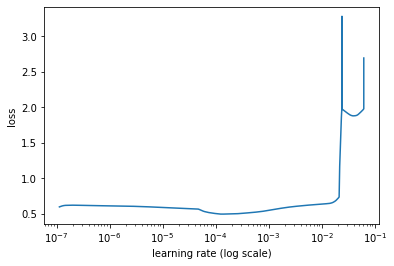

In [ ]:
learner.lr_find(max_epochs=3)
learner.lr_plot()

In [ ]:
learner.fit_onecycle(lr = 1e-4, epochs = 4)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/4
499/499 [==============================] - 381s 763ms/step - loss: 0.1804 - accuracy: 0.9312 - val_loss: 0.7811 - val_accuracy: 0.7230
Epoch 2/4
499/499 [==============================] - 379s 759ms/step - loss: 0.1830 - accuracy: 0.9272 - val_loss: 0.6640 - val_accuracy: 0.7170
Epoch 3/4
499/499 [==============================] - 378s 758ms/step - loss: 0.1302 - accuracy: 0.9522 - val_loss: 0.9190 - val_accuracy: 0.7349
Epoch 4/4
499/499 [==============================] - 378s 758ms/step - loss: 0.0328 - accuracy: 0.9885 - val_loss: 1.2796 - val_accuracy: 0.7313


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
pred_val = ['Positive' if p is 'label' else 'Negative' for p in predictor.predict(df_valid.text.tolist())]

In [ ]:
df_val = pd.DataFrame({'true label':df_valid.label.tolist(),'pred':pred_val})

In [ ]:
df_val.head(10)

,true label,pred
0,1,Positive
1,0,Positive
2,0,Negative
3,1,Positive
4,0,Negative
5,1,Positive
6,0,Negative
7,0,Negative
8,0,Negative
9,1,Positive
